# Socio-economic Factors and WFH rate

## Introduction
In this section, I used ACS data to explore nationwide WFH trend and socio-economic factors associate with it. Then, I leveraged conventional multi-OLS model and machine learning method Random Forest model to predict future WFH rate.

## Methodology
- Overview of WFH rate in the US
- Pre-select features: Based on my experience, I selected features that possibly associate with WFH rate.
- Outlier treatment and feature engineering: clean data, handle outliers and combine similar features such as occupation types.
- Feature selection: using correlation matrix to filter out features that are not highly correlate with WFH, and have high multicollinearity.
- Build, test and improve model: random forest model and multi OLS model
- Use model to predict future wfh rate

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
# load data
df = pd.read_csv('/Users/luchen/Documents/Esri/Project/results/demographic/census_tract/R13409459_SL140.csv', na_values='')

print("Data shape:", df.shape)
print(df.head())

Data shape: (85395, 1319)
     Geo_FIPS                                     Geo_QName Geo_FILEID  \
0  1001020100     Census Tract 201, Autauga County, Alabama      ACSSF   
1  1001020200     Census Tract 202, Autauga County, Alabama      ACSSF   
2  1001020300     Census Tract 203, Autauga County, Alabama      ACSSF   
3  1001020400     Census Tract 204, Autauga County, Alabama      ACSSF   
4  1001020501  Census Tract 205.01, Autauga County, Alabama      ACSSF   

  Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_US  Geo_REGION  \
0         al         140            0          1789     NaN         NaN   
1         al         140            0          1790     NaN         NaN   
2         al         140            0          1791     NaN         NaN   
3         al         140            0          1792     NaN         NaN   
4         al         140            0          1793     NaN         NaN   

   Geo_DIVISION  ...  SE_A08002B_003  SE_A08002B_004  SE_A08002B_005  \
0     

In [4]:
office_model= office_model_raw[[
    'Building Age',
    # 'Office - Worker Density (Number per 1,000 sq ft)',
    # 'Office - Weekly Operating Hours',
    
    
    'ENERGY STAR Score',
    # 'Annual Maximum Demand (kW)',
    
    'mix-used',
    # '% Non-primary gross area',
    
    # from pluto
    'bldgarea',
    'comarea',
    'resarea',
    # 'officearea',
    'retailarea',
    'garagearea',
    'strgearea', # storage area
    'factryarea',
    'otherarea',
    'numfloors',
    # 'bldgfront', 
    # 'bldgdepth',
    'proxcode', # PROXIMITY CODE  0 - Not available 1 - Detached 2 - Semi-attached 3 - Attached
    # 'bsmtcode',# basement
    'builtfar', # floor area ratio 
    'building Coverage',
    'front depth ratio',
    
    'Weather Normalized Site EUI (kBtu/ft²)',
    # 'EUI_2021',
    # 'EUI_2020',
    # 'EUI_2019',
    # 'EUI_2018',
    # 'baseline_EUI',
    # 'EUI_diff_2021_2020',
    # 'EUI_diff_2021_baseline',
    # 'EUI_diff_2020_baseline'
]].copy()

NameError: name 'office_model_raw' is not defined

In [ ]:
office_model= office_model_raw[[
    'Building Age',
    # 'Office - Worker Density (Number per 1,000 sq ft)',
    # 'Office - Weekly Operating Hours',
    
    
    'ENERGY STAR Score',
    # 'Annual Maximum Demand (kW)',
    
    'mix-used',
    # '% Non-primary gross area',
    
    # from pluto
    'bldgarea',
    'comarea',
    'resarea',
    # 'officearea',
    'retailarea',
    'garagearea',
    'strgearea', # storage area
    'factryarea',
    'otherarea',
    'numfloors',
    # 'bldgfront', 
    # 'bldgdepth',
    'proxcode', # PROXIMITY CODE  0 - Not available 1 - Detached 2 - Semi-attached 3 - Attached
    # 'bsmtcode',# basement
    'builtfar', # floor area ratio 
    'building Coverage',
    'front depth ratio',
    
    'Weather Normalized Site EUI (kBtu/ft²)',
    # 'EUI_2021',
    # 'EUI_2020',
    # 'EUI_2019',
    # 'EUI_2018',
    # 'baseline_EUI',
    # 'EUI_diff_2021_2020',
    # 'EUI_diff_2021_baseline',
    # 'EUI_diff_2020_baseline'
]].copy()

In [ ]:
office_model= office_model_raw[[
    'Building Age',
    # 'Office - Worker Density (Number per 1,000 sq ft)',
    # 'Office - Weekly Operating Hours',
    
    
    'ENERGY STAR Score',
    # 'Annual Maximum Demand (kW)',
    
    'mix-used',
    # '% Non-primary gross area',
    
    # from pluto
    'bldgarea',
    'comarea',
    'resarea',
    # 'officearea',
    'retailarea',
    'garagearea',
    'strgearea', # storage area
    'factryarea',
    'otherarea',
    'numfloors',
    # 'bldgfront', 
    # 'bldgdepth',
    'proxcode', # PROXIMITY CODE  0 - Not available 1 - Detached 2 - Semi-attached 3 - Attached
    # 'bsmtcode',# basement
    'builtfar', # floor area ratio 
    'building Coverage',
    'front depth ratio',
    
    'Weather Normalized Site EUI (kBtu/ft²)',
    # 'EUI_2021',
    # 'EUI_2020',
    # 'EUI_2019',
    # 'EUI_2018',
    # 'baseline_EUI',
    # 'EUI_diff_2021_2020',
    # 'EUI_diff_2021_baseline',
    # 'EUI_diff_2020_baseline'
]].copy()

## Features Used in the Model
Target feature
- % Workers 16 Years and Over: Worked At Home


- Basic demographic: 
    - ~~Population~~
    - Population Density (Per Sq. Mile)
    - ~~sex~~
    - ~~age: % Total Population: 18 to 34 Years~~ 
    - race: % White

- Household info:             
    - ~~% household with child~~
    - ~~Average Household Size~~
    - % Households income $100,000 or More
             
- Education level: % Population 25 Years and Over: Bachelor's Degree or Better
             
- Occupations Types:
This classification is based on correlation matrix analysis, and feature engineered from 12 variables to following three in the model.
    - % Workers highly likely WFH, combination of following occupations:
        - Management, Business, and Financial Operations  Occupations
        - Healthcare Support Occupations
    - % Workers very likely WFH, combination of following occupations:
        - Professional and Related Occupations
    - % Workers highly unlikely WFH, combination of following occupations:
        - Transportation and Material Moving Occupations
        - Production Occupations
    - ~~% Workers very unlikely WFH, combination of following occupations:~~
        - ~~Construction, Extraction, and Maintenance  Occupations~~
    - ~~% Workers with other type of occupations~~
             
- Housing info:             
    - ~~% house units occupied by renters~~
    - ~~Vacancy rate~~
    - ~~% housing units have 2.01 or More Occupants Per Room~~
    - ~~% renting housing units have move-in renter 2019 or later~~
    - Median House Value for All Owner-Occupied Housing Units
    - ~~Median Gross Rent as a Percentage of Household  Income in the Past 12 Months (Dollars)~~

- Commuting Means:
    - ~~Average time Commute to Work (In Min)~~
    - % Housing Units by Vehicles Available - No Vehicle Available
             
- ~~% Population Move-in within the year~~

In [ ]:
# filter variables for the model
df_filtered = df[['Geo_FIPS', 'Geo_STATE', 'Geo_COUNTY', 'Geo_QName', 'Geo_STUSAB',
             
             # population
             'SE_A00001_001', 'SE_A00002_002', 
             # A00001_001:     Population
             # A00002_002:     Population Density (Per Sq. Mile)
             
             # sex
             'PCT_SE_A02001_003',
             # A02001_003:      Female
             
             # age
             'PCT_SE_B01001_003', 
             # PCT_B01001_003: % Total Population: 18 to 34 Years 
             
             # race
             'PCT_SE_A03001_002', 
             # A03001_002:      White Alone
             
             ### household type and size
             'PCT_SE_A10007A_014', 'SE_A10003_001', 
             # 'SE_A10003B_001', 
             # A10007A_014:         Child:
             # A10003_001: Average Household Size
             
             # education level
             'PCT_SE_B12001_004', #   PCT_B12001_004: % Population 25 Years and Over: Bachelor's Degree or Better
             
            #  # industry categories
            #  'SE_A17004_001', 'PCT_SE_A17004_002', 'PCT_SE_A17004_003', 'PCT_SE_A17004_004', 'PCT_SE_A17004_005', 'PCT_SE_A17004_006', 
            #  'PCT_SE_A17004_007', 'PCT_SE_A17004_008', 'PCT_SE_A17004_009', 'PCT_SE_A17004_010', 'PCT_SE_A17004_011', 'PCT_SE_A17004_012', 'PCT_SE_A17004_013', 'PCT_SE_A17004_014',
            #  # A17004_001:     Total Employed Civilian Population 16 Years and Over
            #     # PCT_A17004_002: % Employed Civilian Population 16 Years and Over: Agriculture, Forestry, Fishing and Hunting, and Mining
            #     # PCT_A17004_003: % Employed Civilian Population 16 Years and Over: Construction
            #     # PCT_A17004_004: % Employed Civilian Population 16 Years and Over: Manufacturing
            #     # PCT_A17004_005: % Employed Civilian Population 16 Years and Over: Wholesale Trade
            #     # PCT_A17004_006: % Employed Civilian Population 16 Years and Over: Retail Trade
            #     # PCT_A17004_007: % Employed Civilian Population 16 Years and Over: Transportation and Warehousing, and Utilities
            #     # PCT_A17004_008: % Employed Civilian Population 16 Years and Over: Information
            #     # PCT_A17004_009: % Employed Civilian Population 16 Years and Over: Finance and Insurance, and Real Estate and Rental  and Leasing
            #     # PCT_A17004_010: % Employed Civilian Population 16 Years and Over: Professional, Scientific, and Management, and  Administrative and Waste Management Services
            #     # PCT_A17004_011: % Employed Civilian Population 16 Years and Over: Educational Services, and Health Care and Social  Assistance
            #     # PCT_A17004_012: % Employed Civilian Population 16 Years and Over: Arts, Entertainment, and Recreation, and  Accommodation and Food Services
            #     # PCT_A17004_013: % Employed Civilian Population 16 Years and Over: Other Services, Except Public Administration
            #     # PCT_A17004_014: % Employed Civilian Population 16 Years and Over: Public Administration
            
             # occupations
             'PCT_SE_B17008_002', 'PCT_SE_B17008_003', 'PCT_SE_B17008_004', 'PCT_SE_B17008_005', 'PCT_SE_B17008_006', 'PCT_SE_B17008_007',
             'PCT_SE_B17008_008', 'PCT_SE_B17008_009', 'PCT_SE_B17008_010', 'PCT_SE_B17008_011', 'PCT_SE_B17008_012', 'PCT_SE_B17008_013', 'PCT_SE_B17008_014',
                # PCT_B17008_002: % Employed Civilian Population 16 Years and Over: Management, Business, and Financial Operations  Occupations
                # PCT_B17008_003: % Employed Civilian Population 16 Years and Over: Professional and Related Occupations
                # PCT_B17008_004: % Employed Civilian Population 16 Years and Over: Healthcare Support Occupations
                # PCT_B17008_005: % Employed Civilian Population 16 Years and Over: Protective Service Occupations
                # PCT_B17008_006: % Employed Civilian Population 16 Years and Over: Food Preparation and Serving Related Occupations
                # PCT_B17008_007: % Employed Civilian Population 16 Years and Over: Building and Grounds Cleaning and Maintenance  Occupations
                # PCT_B17008_008: % Employed Civilian Population 16 Years and Over: Personal Care and Service Occupations
                # PCT_B17008_009: % Employed Civilian Population 16 Years and Over: Sales and Related Occupations
                # PCT_B17008_010: % Employed Civilian Population 16 Years and Over: Office and Administrative Support Occupations
                # PCT_B17008_011: % Employed Civilian Population 16 Years and Over: Farming, Fishing, and Forestry Occupations
                # PCT_B17008_012: % Employed Civilian Population 16 Years and Over: Construction, Extraction, and Maintenance  Occupations
                # PCT_B17008_013: % Employed Civilian Population 16 Years and Over: Production Occupations
                # PCT_B17008_014: % Employed Civilian Population 16 Years and Over: Transportation and Material Moving Occupations
             
             # household income
             'SE_B14001_001', 'PCT_SE_B14001_002', 'PCT_SE_B14001_003', 'PCT_SE_B14001_004', 'PCT_SE_B14001_005', 'PCT_SE_B14001_006',
                # B14001_001:     Households   
                #   PCT_B14001_002: % Households: Less than $25,000
                #   PCT_B14001_003: % Households: $25,000 to $49,999
                #   PCT_B14001_004: % Households: $50,000 to $74,999
                #   PCT_B14001_005: % Households: $75,000 to $99,999
                #   PCT_B14001_006: % Households: $100,000 or More
             
             # renter occupied rate
             'PCT_SE_A10060_003', 
             # A10060_003:      Renter Occupied
             
             # vacancy rate
             'PCT_SE_A10044_003', 
             # A10044_003:      Vacant
             
             # Housing Units by Number of Occupants Per Room
             'PCT_SE_A10028_006', 
             # A10028_006:      2.01 or More Occupants Per Room
             
             #'PCT_SE_A10063B_002',   
             # renting housing units and newly move-in renter 2019 or later
             
             # house value
             'SE_A10036_001',
             # A10036_001:     Median House Value for All Owner-Occupied Housing Units - Median Value
             
             # renting price
             'SE_A18003_001',
             # A18003_001:   Median Gross Rent as a Percentage of Household  Income in the Past 12 Months (Dollars)
    
             # WFH rate
             'PCT_SE_A09005_008',
             # A09005_001:     Workers 16 Years and Over:
             #   PCT_A09005_008: % Workers 16 Years and Over: Worked At Home
             
             # commuting time
             'SE_A09003_001',
             # A09003_001:     Average Commute to Work (In Min)
             
             # Housing Units by Vehicles Available
             'PCT_SE_A10030_002',
             # A10030_002:      No Vehicle Available
             
             # moving population rate
             'PCT_SE_A08001_002'
             # 209. Residence 1 Year Ago in the United States
               #   Universe:  Population 1 year and Over in the United States
               #   Name:      A08001
               #   Variables:
               #      A08001_001:   Total:
               #      A08001_002:      Same House 1 Year Ago
               #      A08001_003:      Moved WithIn Same County
               #      A08001_004:      Moved From Different County WithIn Same State
               #      A08001_005:      Moved From Different State
               #      A08001_006:      Moved From Abroad

             ]]

print("Data shape:", df_filtered.shape)
print(df_filtered.head())

# print (df_filtered['SE_A00001_001'].min())
# print (df_filtered['SE_A00001_001'].max())

df_filtered.to_csv('/Users/luchen/Documents/Esri/Project/results/demographic/census_tract/acs_census_filtered.csv', index=False)

Data shape: (85395, 41)
     Geo_FIPS  Geo_STATE  Geo_COUNTY  \
0  1001020100          1           1   
1  1001020200          1           1   
2  1001020300          1           1   
3  1001020400          1           1   
4  1001020501          1           1   

                                      Geo_QName Geo_STUSAB  SE_A00001_001  \
0     Census Tract 201, Autauga County, Alabama         al           1791   
1     Census Tract 202, Autauga County, Alabama         al           2010   
2     Census Tract 203, Autauga County, Alabama         al           3577   
3     Census Tract 204, Autauga County, Alabama         al           3802   
4  Census Tract 205.01, Autauga County, Alabama         al           4381   

   SE_A00002_002  PCT_SE_A02001_003  PCT_SE_B01001_003  PCT_SE_A03001_002  \
0       472.1145              49.41              21.38              83.86   
1      1567.6490              44.83              36.02              39.05   
2      1731.8970              53.45      

In [ ]:
### Data Processing and Feature Engineering
### handle outliers
#census = df_filtered[(df_filtered['SE_A00001_001'] >= 200)].copy()

# drop nan
census = df_filtered

# combine occupations
census['PCT_+4_ocp'] = census['PCT_SE_B17008_002'] + census['PCT_SE_B17008_004'] 
census['PCT_+2_ocp'] = census['PCT_SE_B17008_003']
census['PCT_+1_ocp'] = census['PCT_SE_B17008_011'] + census['PCT_SE_B17008_008']
census['PCT_-1_ocp'] = census['PCT_SE_B17008_007'] + census['PCT_SE_B17008_002'] + census['PCT_SE_B17008_005'] + census['PCT_SE_B17008_004'] 
census['PCT_-2_ocp'] = census['PCT_SE_B17008_012']
census['PCT_-4_ocp'] = census['PCT_SE_B17008_014'] + census['PCT_SE_B17008_013']

# # moving rate
# census['moving_in'] = 1 - census['PCT_SE_A08001_002']
              
print("Data shape:", census.shape)
print(census.head())

Data shape: (85395, 47)
     Geo_FIPS  Geo_STATE  Geo_COUNTY  \
0  1001020100          1           1   
1  1001020200          1           1   
2  1001020300          1           1   
3  1001020400          1           1   
4  1001020501          1           1   

                                      Geo_QName Geo_STUSAB  SE_A00001_001  \
0     Census Tract 201, Autauga County, Alabama         al           1791   
1     Census Tract 202, Autauga County, Alabama         al           2010   
2     Census Tract 203, Autauga County, Alabama         al           3577   
3     Census Tract 204, Autauga County, Alabama         al           3802   
4  Census Tract 205.01, Autauga County, Alabama         al           4381   

   SE_A00002_002  PCT_SE_A02001_003  PCT_SE_B01001_003  PCT_SE_A03001_002  \
0       472.1145              49.41              21.38              83.86   
1      1567.6490              44.83              36.02              39.05   
2      1731.8970              53.45      

/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_16988/818419874.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census['PCT_+4_ocp'] = census['PCT_SE_B17008_002'] + census['PCT_SE_B17008_004']
/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_16988/818419874.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census['PCT_+2_ocp'] = census['PCT_SE_B17008_003']
/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_16988/818419874.py:11: SettingWithCopyWarning: 
A value is trying 

In [ ]:
counties_nyc = [5, 47, 61, 81, 85]
nyc = census[(census['Geo_COUNTY'].isin(counties_nyc)) & (census['Geo_STUSAB'] == 'ny')].copy()


print(nyc.shape)
print(nyc.head())
# (2327, 47)

(2327, 47)
          Geo_FIPS  Geo_STATE  Geo_COUNTY  \
49833  36005000100         36           5   
49834  36005000200         36           5   
49835  36005000400         36           5   
49836  36005001600         36           5   
49837  36005001901         36           5   

                                        Geo_QName Geo_STUSAB  SE_A00001_001  \
49833      Census Tract 1, Bronx County, New York         ny           6661   
49834      Census Tract 2, Bronx County, New York         ny           4453   
49835      Census Tract 4, Bronx County, New York         ny           6000   
49836     Census Tract 16, Bronx County, New York         ny           6038   
49837  Census Tract 19.01, Bronx County, New York         ny           2168   

       SE_A00002_002  PCT_SE_A02001_003  PCT_SE_B01001_003  PCT_SE_A03001_002  \
49833       10286.08               7.27              46.40              40.23   
49834       25469.08              44.40              23.06              27.73   


In [ ]:
# correlation modeling

# STEP 2 - Selected Features

corr = nyc[[
             # population
             #'SE_A00001_001', 
            'SE_A00002_002', 
             # A00001_001:     Population
             # A00002_002:     Population Density (Per Sq. Mile)
             
             # sex
            # 'PCT_SE_A02001_003',
             # A02001_003:      Female
             
             # age
            # 'PCT_SE_B01001_003', 
             # PCT_B01001_003: % Total Population: 18 to 34 Years 
             
             # race
            'PCT_SE_A03001_002', 
             # A03001_002:      White Alone
             
             ### household type and size
             'PCT_SE_A10007A_014', 
             #'SE_A10003_001', 
             # 'SE_A10003B_001', 
             # A10007A_014:         Child:
             # A10003_001: Average Household Size
             
             # education level
             'PCT_SE_B12001_004', #   PCT_B12001_004: % Population 25 Years and Over: Bachelor's Degree or Better
             
             # occupations
            #  'PCT_SE_B17008_002', 
            #  'PCT_SE_B17008_003', 
            #  'PCT_SE_B17008_004', 
            #  'PCT_SE_B17008_005', 
            #  'PCT_SE_B17008_006', 
            #  'PCT_SE_B17008_007',
            #  'PCT_SE_B17008_008', 
            #  'PCT_SE_B17008_009', 
            #  'PCT_SE_B17008_010', 
            #  'PCT_SE_B17008_011', 
            #  'PCT_SE_B17008_012', 
            #  'PCT_SE_B17008_013', 
            #  'PCT_SE_B17008_014',
            #  #'PCT_ocp_003005', # combine
            #     # PCT_B17008_002: % Employed Civilian Population 16 Years and Over: Management, Business, and Financial Operations  Occupations
            #     # PCT_B17008_003: % Employed Civilian Population 16 Years and Over: Professional and Related Occupations
            #     # PCT_B17008_004: % Employed Civilian Population 16 Years and Over: Healthcare Support Occupations
            #     # PCT_B17008_005: % Employed Civilian Population 16 Years and Over: Protective Service Occupations
            #     # PCT_B17008_006: % Employed Civilian Population 16 Years and Over: Food Preparation and Serving Related Occupations
            #     # PCT_B17008_007: % Employed Civilian Population 16 Years and Over: Building and Grounds Cleaning and Maintenance  Occupations
            #     # PCT_B17008_008: % Employed Civilian Population 16 Years and Over: Personal Care and Service Occupations
            #     # PCT_B17008_009: % Employed Civilian Population 16 Years and Over: Sales and Related Occupations
            #     # PCT_B17008_010: % Employed Civilian Population 16 Years and Over: Office and Administrative Support Occupations
            #     # PCT_B17008_011: % Employed Civilian Population 16 Years and Over: Farming, Fishing, and Forestry Occupations
            #     # PCT_B17008_012: % Employed Civilian Population 16 Years and Over: Construction, Extraction, and Maintenance  Occupations
            #     # PCT_B17008_013: % Employed Civilian Population 16 Years and Over: Production Occupations
            #     # PCT_B17008_014: % Employed Civilian Population 16 Years and Over: Transportation and Material Moving Occupations

            'PCT_+4_ocp', 
            'PCT_+2_ocp', 
            #'PCT_+1_ocp', 
            #'PCT_-1_ocp', 
            'PCT_-2_ocp', 
            'PCT_-4_ocp',
            
             # household income
            'PCT_SE_B14001_006',
                #   PCT_B14001_006: % Households: $100,000 or More
             
             # renter occupied rate
            'PCT_SE_A10060_003', 
             # A10060_003:      Renter Occupied
             
             # vacancy rate
            # 'PCT_SE_A10044_003', 
             # A10044_003:      Vacant
             
             # Housing Units by Number of Occupants Per Room
            # 'PCT_SE_A10028_006', 
             # A10028_006:      2.01 or More Occupants Per Room
             
            # 'PCT_SE_A10063B_002',   
             # renting housing units and newly move-in renter 2019 or later
             
             # house value
             #'SE_A10036_001',
             # A10036_001:     Median House Value for All Owner-Occupied Housing Units - Median Value
             
             # renting price
            # 'SE_A18003_001',
             # A18003_001:   Median Gross Rent as a Percentage of Household  Income in the Past 12 Months (Dollars)
    
             # WFH rate
            'PCT_SE_A09005_008',
             # A09005_001:     Workers 16 Years and Over:
             #   PCT_A09005_008: % Workers 16 Years and Over: Worked At Home
             
             # commuting time
            'SE_A09003_001',
             # A09003_001:     Average Commute to Work (In Min)
             
            #'PCT_likely_ocp', 'PCT_unlikely_ocp',
            
             # Housing Units by Vehicles Available
            # 'PCT_SE_A10030_002',
             # A10030_002:      No Vehicle Available
             
             # moving population rate
             #'moving_in'
            # 'PCT_SE_A08001_002'
             # 209. Residence 1 Year Ago in the United States
               #   Universe:  Population 1 year and Over in the United States
               #   Name:      A08001
               #   Variables:
               #      A08001_001:   Total:
               #      A08001_002:      Same House 1 Year Ago
               #      A08001_003:      Moved WithIn Same County
               #      A08001_004:      Moved From Different County WithIn Same State
               #      A08001_005:      Moved From Different State
               #      A08001_006:      Moved From Abroad

             ]]
# corr.to_csv('/Users/luchen/Documents/Esri/Project/results/demographic/census_tract/filtered_acs_census.csv', index=False)
print(corr.shape)
print(corr.head())


(2327, 12)
       SE_A00002_002  PCT_SE_A03001_002  PCT_SE_A10007A_014  \
49833       10286.08              40.23                0.00   
49834       25469.08              27.73               32.20   
49835       20163.68              30.15               32.52   
49836       32238.83              16.50               31.45   
49837       27389.77              30.63               27.95   

       PCT_SE_B12001_004  PCT_+4_ocp  PCT_+2_ocp  PCT_-2_ocp  PCT_-4_ocp  \
49833               2.38         NaN         NaN         NaN         NaN   
49834              32.31       11.90       37.08        3.06       14.42   
49835              29.09       23.09       18.93        6.01        7.16   
49836              18.35       22.61       23.80        1.95       13.14   
49837              31.64       26.68       20.97        4.43        7.67   

       PCT_SE_B14001_006  PCT_SE_A10060_003  PCT_SE_A09005_008  SE_A09003_001  
49833                NaN                NaN                NaN           

In [ ]:
# change factor
corr['wfh_factors'] = corr['PCT_SE_A09005_008'].copy()

# Determine how many values you want to change
num_to_change = len(corr['wfh_factors'])

# Generate random values around 0 with a standard deviation of 0.05
random_values = np.random.normal(0, 0.05, num_to_change)

# Add the random values to the original data
corr['wfh_factors'] += random_values

num_to_change_1 = int(0.2 * len(corr['wfh_factors']))
num_to_change_2 = int(0.07 * len(corr['wfh_factors']))
num_to_change_3 = int(0.05 * len(corr['wfh_factors']))

# Randomly select indices of the dataframe for each change group
indices_to_change_1 = np.random.choice(corr.index, num_to_change_1, replace=False)
indices_to_change_2 = np.random.choice(list(set(corr.index) - set(indices_to_change_1)), num_to_change_2, replace=False)
indices_to_change_3 = np.random.choice(list(set(corr.index) - set(indices_to_change_1) - set(indices_to_change_2)), num_to_change_3, replace=False)

# Generate random values within each specific range
random_multipliers_1 = np.random.uniform(0.47, 1.4, size=num_to_change_1)
random_multipliers_2 = np.random.uniform(1.0, 2.2, size=num_to_change_2)
random_multipliers_3 = np.random.uniform(0.05, 1.0, size=num_to_change_3)

# Change the selected values in the dataframe
corr.loc[indices_to_change_1, 'wfh_factors'] *= random_multipliers_1
corr.loc[indices_to_change_2, 'wfh_factors'] *= random_multipliers_2
corr.loc[indices_to_change_3, 'wfh_factors'] *= random_multipliers_3


PCT_SE_A09005_008     1.000000
wfh_factors           0.925296
PCT_SE_B12001_004     0.678478
PCT_+2_ocp            0.535229
PCT_SE_B14001_006     0.474252
PCT_+4_ocp            0.443017
PCT_SE_A03001_002     0.436111
SE_A00002_002         0.154275
PCT_SE_A10060_003     0.041425
PCT_-2_ocp           -0.381733
SE_A09003_001        -0.396528
PCT_SE_A10007A_014   -0.446662
PCT_-4_ocp           -0.454941
Name: PCT_SE_A09005_008, dtype: float64


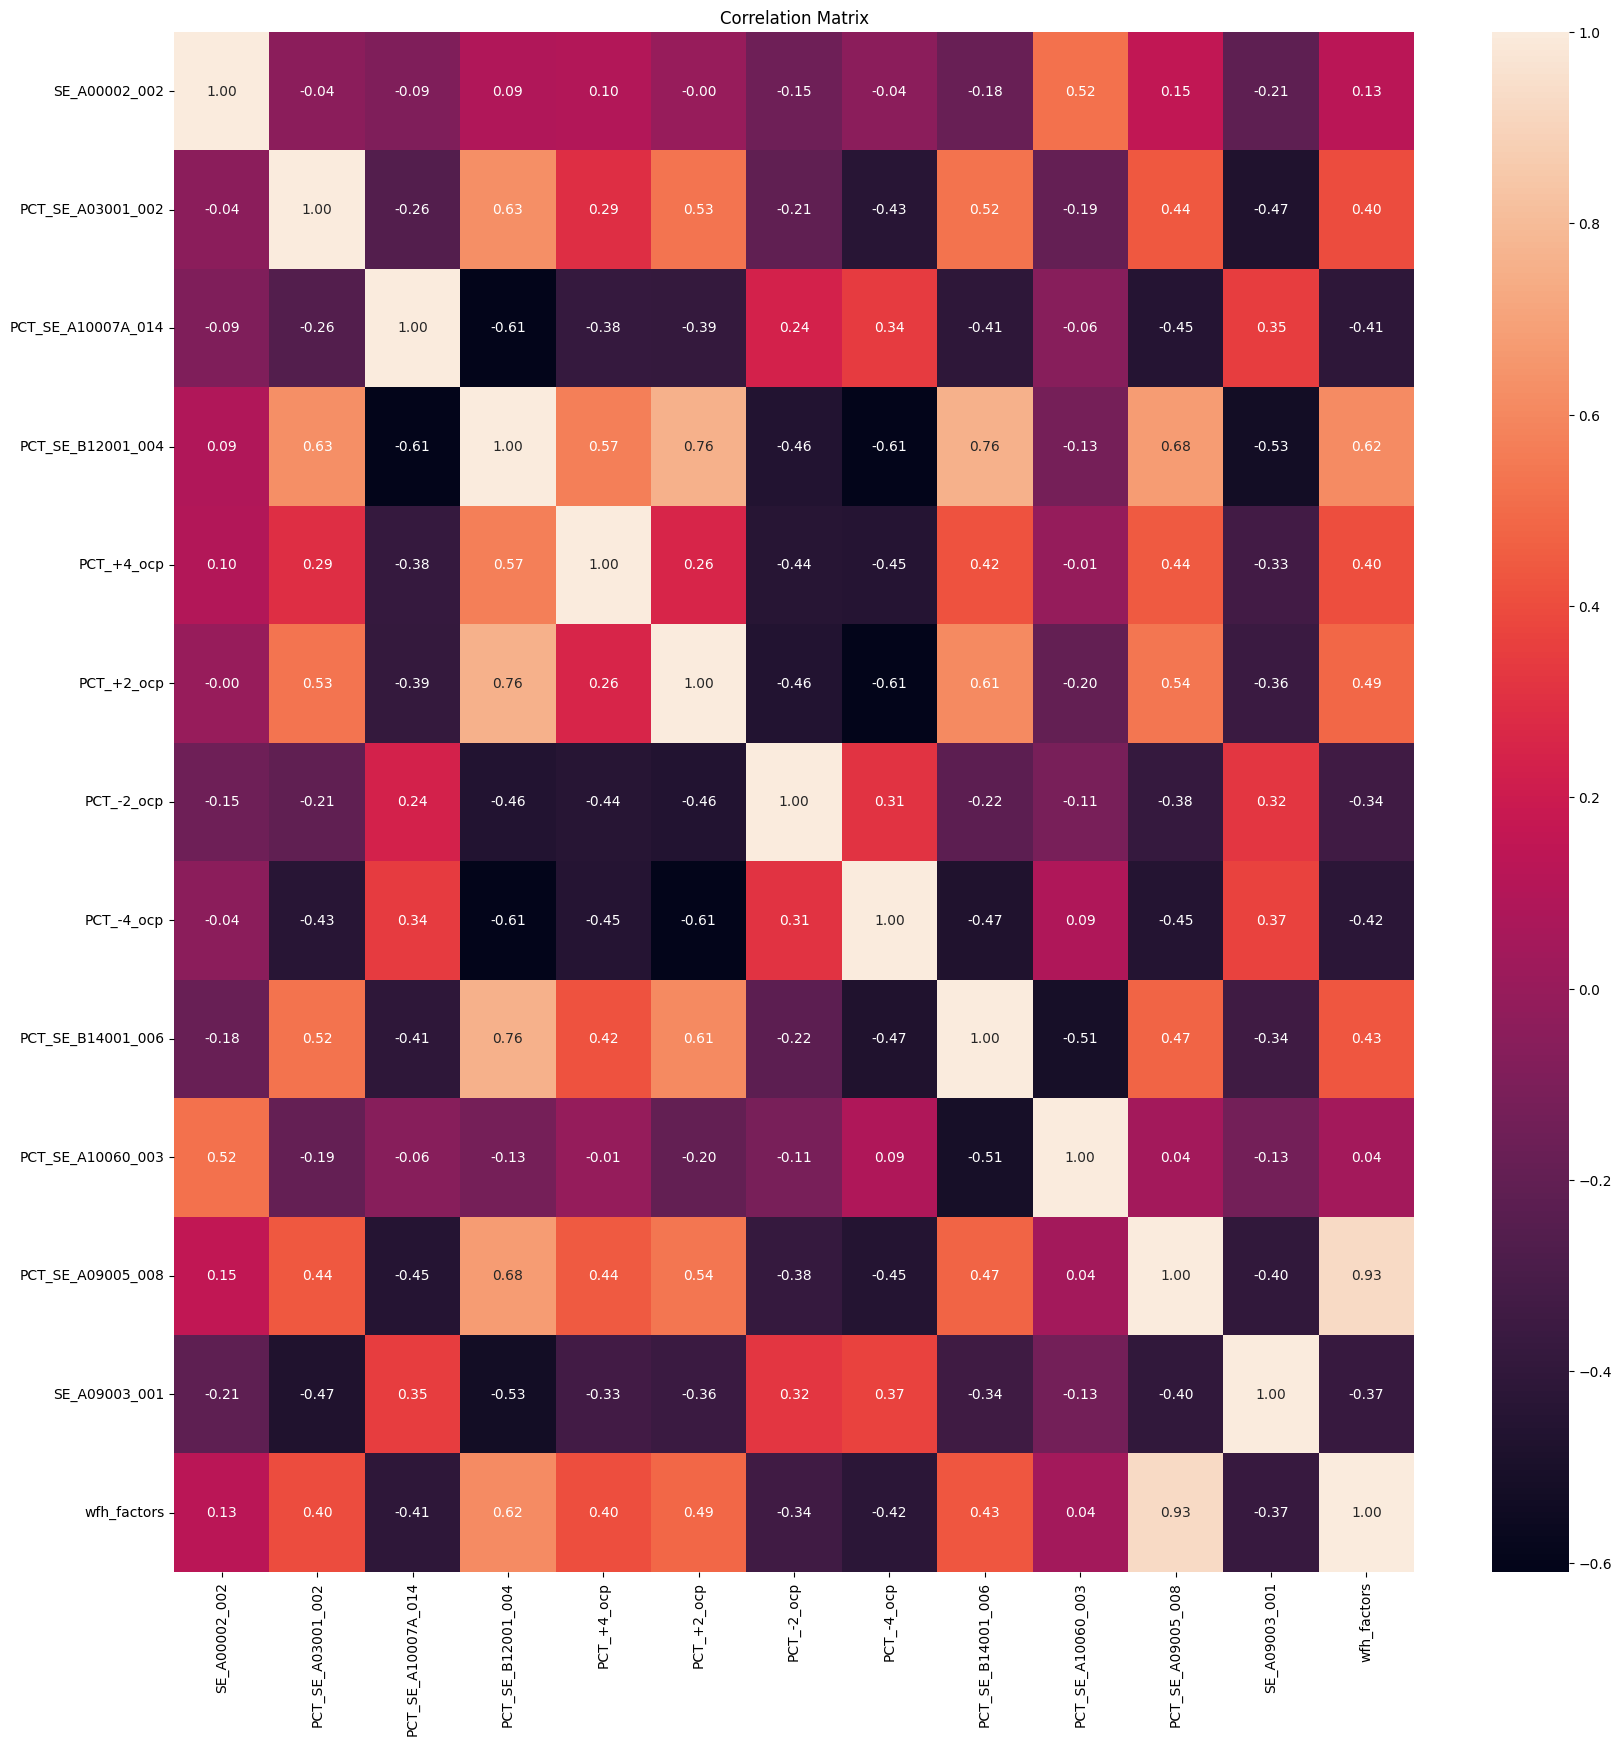

In [ ]:

# create a correlation matrix
corr_matrix = corr.corr()
print(corr_matrix['PCT_SE_A09005_008'].sort_values(ascending=False))


# plot a heatmap to visualize the correlations
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

corr_matrix = corr_matrix['PCT_SE_A09005_008']

In [ ]:
# ## Clean up df
# corr_viz = census[[
#              # population
#              #'SE_A00001_001', 
#              'SE_A00002_002', 
#              # A00001_001:     Population
#              # A00002_002:     Population Density (Per Sq. Mile)
             
#              # race
#              'PCT_SE_A03001_002', 
#              # A03001_002:      White Alone
             
#              # education level
#              'PCT_SE_B12001_004', #   PCT_B12001_004: % Population 25 Years and Over: Bachelor's Degree or Better

#             'PCT_+4_ocp', 
#             'PCT_+2_ocp', 
#             # 'PCT_+1_ocp', 
#             # 'PCT_-1_ocp', 
#             #'PCT_-2_ocp', 
#             'PCT_-4_ocp',
            
#              # household income
#              'PCT_SE_B14001_006',
#                 #   PCT_B14001_006: % Households: $100,000 or More
             
#              # house value
#              'SE_A10036_001',
#              # A10036_001:     Median House Value for All Owner-Occupied Housing Units - Median Value

#              # WFH rate
#              'PCT_SE_A09005_008',
#              # A09005_001:     Workers 16 Years and Over:
#              #   PCT_A09005_008: % Workers 16 Years and Over: Worked At Home
            
#              # Housing Units by Vehicles Available
#              'PCT_SE_A10030_002',
#              # A10030_002:      No Vehicle Available

#              ]].copy()

# column_name_map = {
#                     'SE_A00002_002': 'Population Density',
#                     'PCT_SE_A03001_002': '% White population',
#                     'PCT_SE_B12001_004': ' % Bachelor or higher',
#                     'PCT_+4_ocp': '% Occupations - Highly likely WFH',
#                     'PCT_+2_ocp': '% Occupations - Very likely WFH',
#                     'PCT_-4_ocp': '% Occupations - Highly unlikely WFH',
#                     'PCT_SE_B14001_006': '% Households income $100,000 or More',
#                     'SE_A10036_001': 'Median House Value',
#                     'PCT_SE_A10030_002': '% No Vehicle household',
#                     'PCT_SE_A09005_008': 'WFH rate'
#                     }

# # Rename the columns using the dictionary
# corr_viz.rename(columns=column_name_map, inplace=True)

# corr_viz.to_csv('/Users/luchen/Documents/Esri/Project/results/demographic/modeling_wfh.csv', index=False)


In [ ]:
# We'll use linear regression to try to predict 'PCT_SE_A09005_008'
# First, drop the non-numerical columns
corr = corr.dropna(axis = 0)
numerical_df = corr.select_dtypes(include=[np.number])
# numerical_df = numerical_df.dropna(axis=0)  # drop any rows with missing data

# prepare the data for the model
X = numerical_df.drop(['PCT_SE_A09005_008'], axis=1)  # feature columns
y = numerical_df['PCT_SE_A09005_008']  # target column

print(numerical_df.shape)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print model accuracy
print("Model Accuracy: ", model.score(X_test, y_test))

# print root mean squared error of the model
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

(2216, 13)
Model Accuracy:  0.8091178015288405
Root Mean Squared Error:  3.018503114979278


In [ ]:
#### correlations with 'PCT_SE_A09005_008' > 0.1
# Use boolean indexing to filter out rows with absolute correlation less than threshold
corr_matrix_01 = corr_matrix[corr_matrix.abs() > 0.1].dropna()

# Now 'filtered_corr_matrix' is your filtered correlation matrix
print(corr_matrix_01.sort_values(ascending=False))

# PCT_SE_A09005_008     1.000000 
# PCT_SE_B17008_002     0.670137 job - Management, Business, and Financial Operations  Occupations
# PCT_SE_B12001_004     0.570593 bachelor and higher education
# SE_A10036_001         0.522578 house Median Value
# PCT_SE_B14001_006     0.496803 Households income: $100,000 or More
# PCT_SE_B17008_003     0.310810 job - Professional and Related Occupations
# SE_A00001_001         0.209459 Total Population
#### PCT_SE_A10028_002     0.157873 Occupied Housing Units: 0.50 or Less Occupants Per Room
# PCT_SE_A03001_002     0.148828 White Alone rate
# SE_A00002_002         0.130798 Population Density (Per Sq. Mile)
# PCT_SE_B17008_008     0.122832 job - Personal Care and Service Occupations
# SE_A10003_001        -0.102801 Average Household Size
# PCT_SE_B17008_004    -0.132468 job - Healthcare Support Occupations
# PCT_SE_B17008_007    -0.133276 job - Building and Grounds Cleaning and Maintenance  Occupations
# PCT_SE_A10030_002    -0.141094 Occupied Housing Units: No Vehicle Available
# PCT_SE_A10007A_014   -0.154723 Child
# PCT_SE_B17008_005    -0.171769 job - Protective Service Occupations
# PCT_SE_B17008_012    -0.230769 job - Construction, Extraction, and Maintenance  Occupations
# PCT_SE_B17008_014    -0.415333 job - Transportation and Material Moving Occupations
# PCT_SE_B17008_013    -0.437578 job - Production Occupations

# filter origional df, only keep above variables
cols_to_keep = corr_matrix_01.index.str.split().str[0]
corr_01 = corr[cols_to_keep]

# column_name_map = {
#                     'SE_A00002_002': 'Population Density',
#                     'PCT_SE_A03001_002': '% White population',
#                     'PCT_SE_B12001_004': ' % Bachelor or higher',
#                     'PCT_+4_ocp': '% Occupations - Highly likely WFH',
#                     'PCT_+2_ocp': '% Occupations - Very likely WFH',
#                     'PCT_-4_ocp': '% Occupations - Highly unlikely WFH',
#                     'PCT_SE_B14001_006': '% Households income $100,000 or More',
#                     'SE_A10036_001': 'Median House Value',
#                     'PCT_SE_A10030_002': '% No Vehicle household',
#                     'PCT_SE_A09005_008': 'WFH rate'
#                     }

# # Rename the columns using the dictionary
# corr_01 .rename(columns=column_name_map, inplace=True)

corr_01.head()

PCT_SE_A09005_008     1.000000
wfh_factors           0.925296
PCT_SE_B12001_004     0.678478
PCT_+2_ocp            0.535229
PCT_SE_B14001_006     0.474252
PCT_+4_ocp            0.443017
PCT_SE_A03001_002     0.436111
SE_A00002_002         0.154275
PCT_-2_ocp           -0.381733
SE_A09003_001        -0.396528
PCT_SE_A10007A_014   -0.446662
PCT_-4_ocp           -0.454941
Name: PCT_SE_A09005_008, dtype: float64


,SE_A00002_002,PCT_SE_A03001_002,PCT_SE_A10007A_014,PCT_SE_B12001_004,PCT_+4_ocp,PCT_+2_ocp,PCT_-2_ocp,PCT_-4_ocp,PCT_SE_B14001_006,PCT_SE_A09005_008,SE_A09003_001,wfh_factors
49834,25469.080,27.73,32.20,32.31,11.90,37.08,3.06,14.42,39.51,1.62,44.0,1.634350
49835,20163.680,30.15,32.52,29.09,23.09,18.93,6.01,7.16,45.66,3.96,48.0,3.989096
49836,32238.830,16.50,31.45,18.35,22.61,23.80,1.95,13.14,18.43,5.99,47.0,6.058232
49837,27389.770,30.63,27.95,31.64,26.68,20.97,4.43,7.67,24.18,14.90,39.0,14.829131
49838,7713.598,20.80,22.09,17.90,20.58,22.20,3.08,20.42,27.66,2.11,46.0,2.206633


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set 
X = corr_01  # fill this with the names of your features

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data.sort_values(by='VIF'))

### New variables
#                feature         VIF
# 0        SE_A00001_001    1.479032
# 1        SE_A00002_002    1.756214
# 9    PCT_SE_B17008_005    4.463159
# 19   PCT_SE_A10030_002    5.623752
# 11   PCT_SE_B17008_008    6.981120
# 8    PCT_SE_B17008_004    7.251015
# 13   PCT_SE_B17008_013    9.312683
# 18   PCT_SE_A09005_008    9.433707
# 10   PCT_SE_B17008_007   10.261999
# 17       SE_A10036_001   13.065851
# 14   PCT_SE_B17008_014   18.448536
# 12   PCT_SE_B17008_012   18.750001
# 15   PCT_SE_B14001_006   25.406699
# 6    PCT_SE_B17008_002   35.256899
# 2    PCT_SE_A03001_002   37.401615 white
# 5    PCT_SE_B12001_004   37.854384 Bachelor's Degree or Better
# 7    PCT_SE_B17008_003   55.569799 Professional and Related Occupations
# 3   PCT_SE_A10007A_014  121.987911 child
#### x 16   PCT_SE_A10028_002  166.248418 0.50 or Less Occupants Per Room
# 4        SE_A10003_001  245.544362 Average Household Size   

               feature        VIF
0        SE_A00002_002   3.609904
6           PCT_-2_ocp   3.846945
7           PCT_-4_ocp   5.575831
1    PCT_SE_A03001_002   5.630827
4           PCT_+4_ocp  14.494930
8    PCT_SE_B14001_006  14.920241
2   PCT_SE_A10007A_014  15.728904
11         wfh_factors  17.248030
5           PCT_+2_ocp  19.131682
9    PCT_SE_A09005_008  22.255617
3    PCT_SE_B12001_004  31.386849
10       SE_A09003_001  31.860404


In [ ]:
# Random Forest Prediction

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

corr = corr.dropna(axis = 0)
numerical_df = corr.select_dtypes(include=[np.number])
# numerical_df = numerical_df.dropna(axis=0)  # drop any rows with missing data

# prepare the data for the model
X = numerical_df.drop(['PCT_SE_A09005_008'], axis=1)  # feature columns
y = numerical_df['PCT_SE_A09005_008']  # target column

# Split the data into training and testing sets[[']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Use the model to predict the test set results
y_pred = rf.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate Model Accuracy
r_sqr = rf.score(X_test, y_test)

print(f'R square: {r_sqr}')
print(f'Root Mean Squared Error: {rmse}')

# Model Accuracy: 0.5629331712186789
# Root Mean Squared Error: 2.4598529939068827

### 0.1
# Model Accuracy: 0.5704371756265633
# Root Mean Squared Error: 2.438644950165364

### new variable with all occupations
# Model Accuracy: 0.5891962418595987
# Root Mean Squared Error: 2.511640282113597

R square: 0.8732513160688222
Root Mean Squared Error: 2.459691518044781


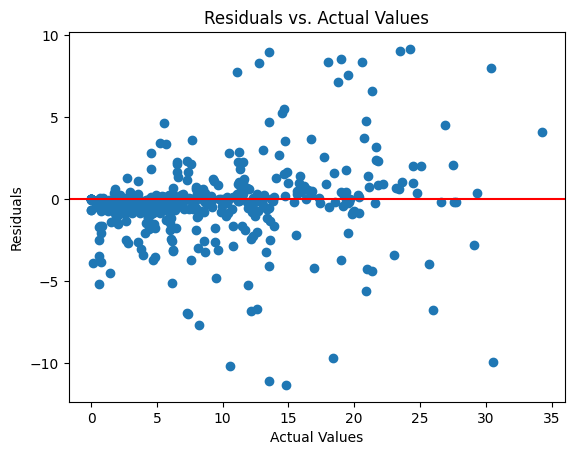

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Create a scatter plot of the residuals
plt.scatter(y_test, residuals)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-') # This line indicates where residuals would be 0
plt.title('Residuals vs. Actual Values')
plt.show()

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.metrics import mean_squared_error
# import numpy as np

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
# }

# # Initialize the model
# rf = RandomForestRegressor(random_state=42)

# # Initialize the grid search model
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)

# # Fit the grid search to the data
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_

# # Train and predict using the model with the best parameters
# rf_best = RandomForestRegressor(**best_params, random_state=42)
# rf_best.fit(X_train, y_train)
# y_pred = rf_best.predict(X_test)

# # Calculate RMSE
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# # Calculate Model Accuracy
# r_sqr = rf_best.score(X_test, y_test)

# print(f'Best Parameters: {best_params}')
# print(f'R square: {r_sqr}')
# print(f'Root Mean Squared Error: {rmse}')

# Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
# R square: 0.5957757738307609
# Root Mean Squared Error: 2.491445576945272


In [ ]:
# ### Best Random Forest

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the model with the best parameters
# rf = RandomForestRegressor(n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_depth=None, random_state=42)

# # Fit the model on the training data
# rf.fit(X_train, y_train)

# # Use the model to predict the test set results
# y_pred = rf.predict(X_test)

# # Calculate RMSE
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# # Calculate Model Accuracy
# r_sqr = rf.score(X_test, y_test)

# print(f'R square: {r_sqr}')
# print(f'Root Mean Squared Error: {rmse}')

In [ ]:
## Multi-OLS

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# predictor variables are stored in X and your target variable in y
# We'll use linear regression to try to predict 'PCT_SE_A09005_008'
# First, drop the non-numerical columns
corr = corr.dropna(axis = 0)
numerical_df = corr.select_dtypes(include=[np.number])
# numerical_df = numerical_df.dropna(axis=0)  # drop any rows with missing data

# prepare the data for the model
X = numerical_df.drop(['PCT_SE_A09005_008'], axis=1)  # feature columns
y = numerical_df['PCT_SE_A09005_008']  # target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the independent value
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Conduct the multiple linear regression
model = sm.OLS(y_train, X_train).fit()

# Print the summary statistics of the regression model
print(model.summary())

# Predict the test set results
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r_sqr = model.rsquared

print(f'R square: {r_sqr}')
print(f'Root Mean Squared Error: {rmse}')


                            OLS Regression Results                            
Dep. Variable:      PCT_SE_A09005_008   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     1197.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:14:49   Log-Likelihood:                -4086.6
No. Observations:                1772   AIC:                             8199.
Df Residuals:                    1759   BIC:                             8270.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.7160      0

                            OLS Regression Results                            
==============================================================================
Dep. Variable:      PCT_SE_A09005_008   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     2011.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:11:50   Log-Likelihood:                -4243.0
No. Observations:                1782   AIC:                             8500.
Df Residuals:                    1775   BIC:                             8538.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8100      0.443     -1.829      0.068      -1.679       0.059
PCT_SE_A10007A_014    -0.0013      0.008     -0.150      0.881      -0.018       0.015
PCT_SE_B12001_004      0.0500      0.006      8.354      0.000       0.038       0.062
PCT_+4_ocp             0.0145      0.009      1.580      0.114      -0.004       0.033
PCT_+2_ocp             0.0193      0.008      2.283      0.023       0.003       0.036
PCT_SE_A10060_003      0.0101      0.003      4.008      0.000       0.005       0.015
wfh_factors            0.7366      0.010     72.744      0.000       0.717       0.757
==============================================================================
Omnibus:                      375.973   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13170.648
Skew:                           0.064   Prob(JB):                         0.00
Kurtosis:                      16.318   Cond. No.                         632.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
R square: 0.8717805822105813
Root Mean Squared Error: 2.6295481861446297

In [ ]:
# ### HOW TO USE THE RANDOM FOREST MODEL
# # Assuming that 'future_data' is your new data for which you want to predict WFH rates.
# # 'future_data' should be a DataFrame that includes all the necessary features 
# # and is preprocessed in the same way as your training and test data.

# # Make sure that the new data has the same features as the data the model was trained on.
# assert set(future_data.columns) == set(X.columns), "Features do not match!"

# future_predictions = rf.predict(future_data)

# # Now, 'future_predictions' contains the predicted WFH rates for your future data.
# print(future_predictions)

In [5]:
# Predicted values
fitted_values = model.predict()

# Residuals
residuals = model.resid

plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

NameError: name 'model' is not defined

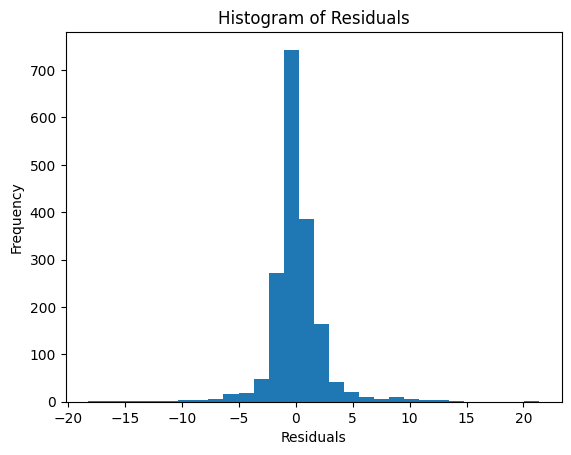

In [ ]:
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()